In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#Analysis of India's Data

In [ ]:
INA =pd.read_csv('hospital_beds_per_india_v1.csv')
INA.head()

,country,state,county,lat,lng,type,measure,beds,population,year,source,source_url
0,IN,AN,NaN,11.7401,92.6586,TOTAL,1000HAB,2.825081,380520,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
1,IN,AP,NaN,15.9129,79.7400,TOTAL,1000HAB,0.436072,53060000,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
2,IN,AR,NaN,28.2180,94.7278,TOTAL,1000HAB,1.427893,1683600,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
3,IN,AS,NaN,26.2006,92.9376,TOTAL,1000HAB,0.497753,34438756,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
4,IN,BR,NaN,25.0961,85.3131,TOTAL,1000HAB,0.094838,122988691,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147


#Removing unwanted columns

In [ ]:
INA.drop(columns=['source_url','lng','lat','county','source','year'] , inplace=True)
INA.head()


,country,state,type,measure,beds,population
0,IN,AN,TOTAL,1000HAB,2.825081,380520
1,IN,AP,TOTAL,1000HAB,0.436072,53060000
2,IN,AR,TOTAL,1000HAB,1.427893,1683600
3,IN,AS,TOTAL,1000HAB,0.497753,34438756
4,IN,BR,TOTAL,1000HAB,0.094838,122988691


#Total no. of beds


* Actual no of beds = INA['beds']*INA['population']
                




In [ ]:
INA['total beds']=INA['beds']*INA['population']
INA['total beds'].head()

0    1.075000e+06
1    2.313798e+07
2    2.404001e+06
3    1.714199e+07
4    1.166400e+07
Name: total beds, dtype: float64

#Data Exploration

In [ ]:
INA.dtypes

country        object
state          object
type           object
measure        object
beds          float64
population      int64
total beds    float64
dtype: object

In [ ]:
#Finding Misssing values
INA.isnull().sum()

country       0
state         0
type          0
measure       0
beds          0
population    0
total beds    0
dtype: int64



*   Hence, There are no Missing values un out Required data set




#Univariate Analysis of total no of beds

In [ ]:
INA['total beds'].describe()

count    3.700000e+01
mean     3.859384e+07
std      1.164970e+08
min      2.400001e+05
25%      3.012000e+06
50%      1.124001e+07
75%      2.438299e+07
max      7.139862e+08
Name: total beds, dtype: float64

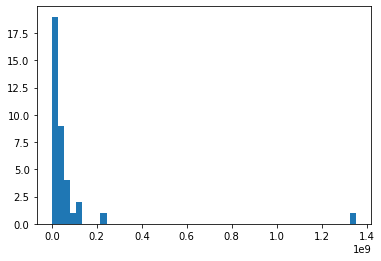

In [ ]:
plt.hist(INA['population'], bins=50)
plt.show()

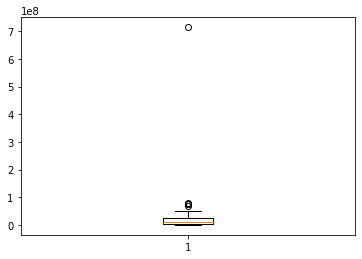

In [ ]:
plt.boxplot(INA['total beds'])
plt.show()

#Bivariate Analysis

#State v/s Population

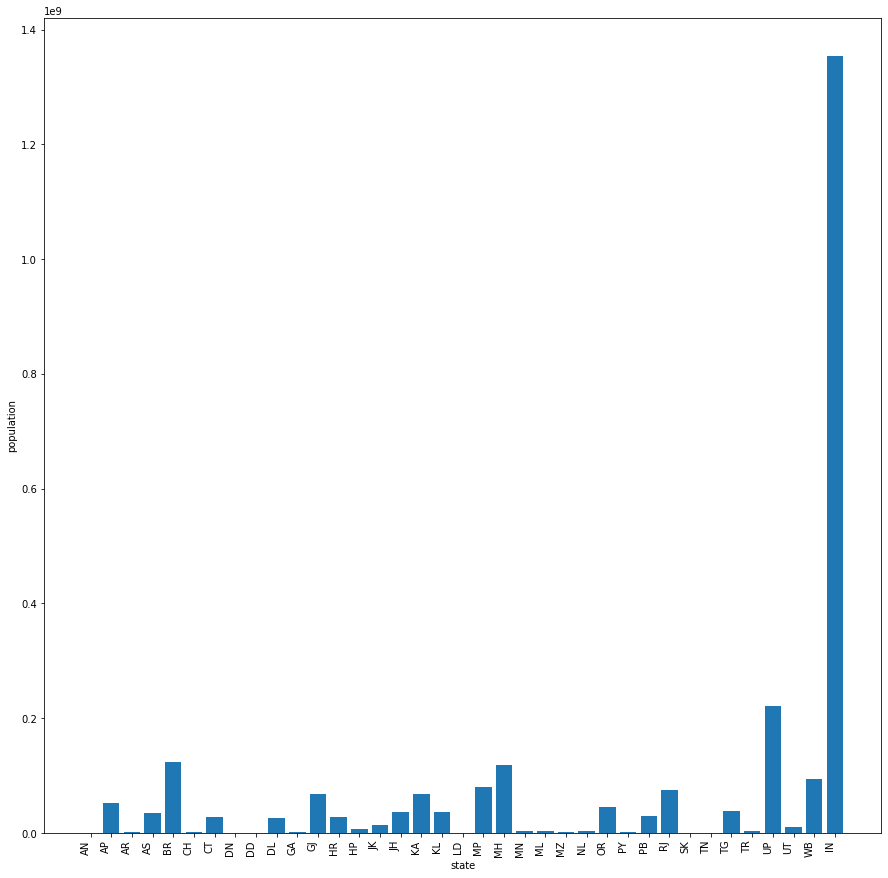

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.xlabel('state')
plt.ylabel('population')
ax.bar(INA['state'],INA['population'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, horizontalalignment='right')
plt.show()

* 'IN' field here is not cosidered as state and it represent the total population of india , we have to remove this.

In [ ]:
#Removing the defaulter from state
i = INA[INA['state']=='IN'].index
INA.drop(i,inplace=True)

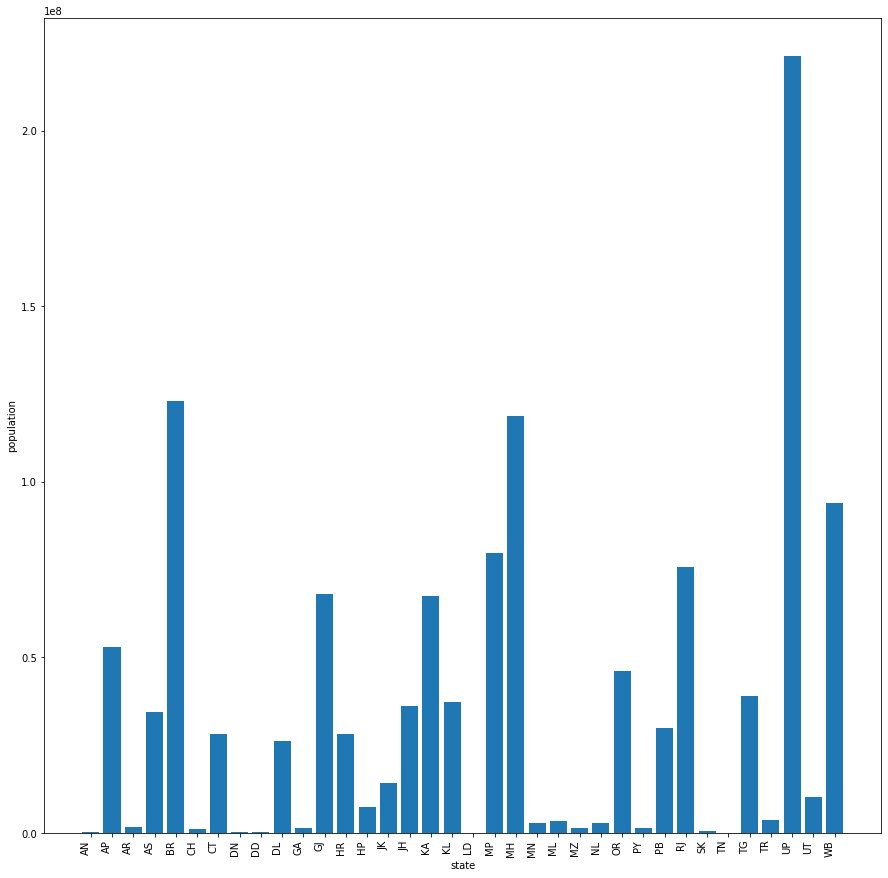

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.xlabel('state')
plt.ylabel('population')
ax.bar(INA['state'],INA['population'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, horizontalalignment='right')
plt.show()



*   UP has maximum population




#State v/s Total beds

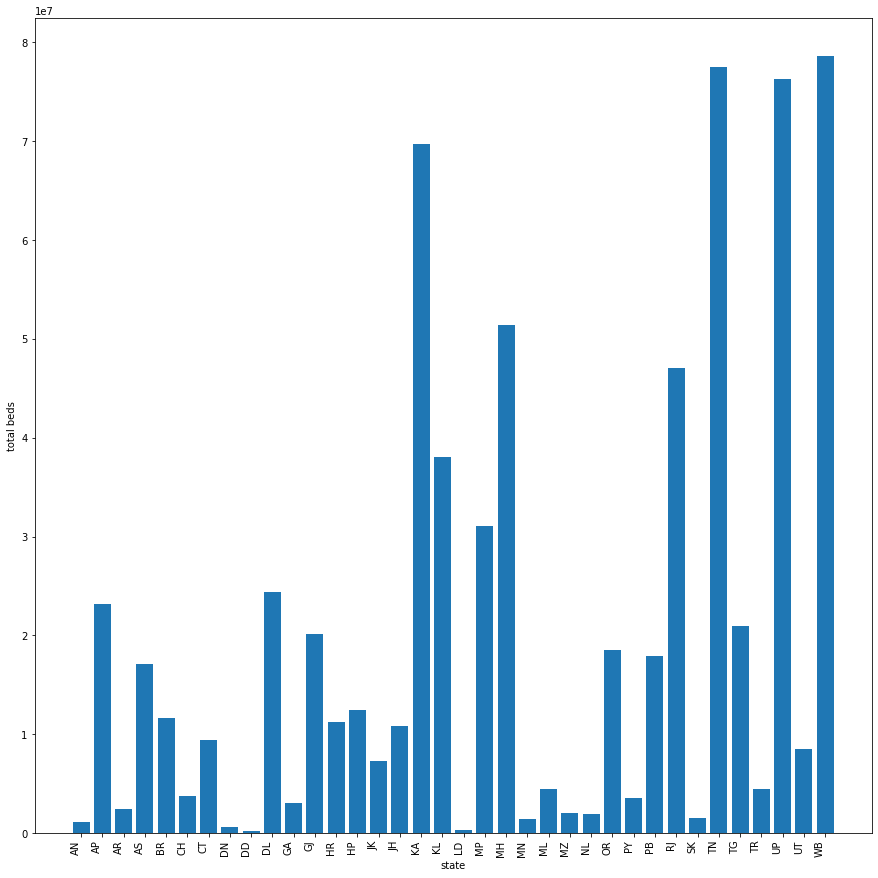

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

plt.xlabel('state')
plt.ylabel('total beds')
ax.bar(INA['state'],INA['total beds'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, horizontalalignment='right')
plt.show()

* West Bengal has maximum no of total beds over the population
*Similarly,Tamil Nadu and Uttar Pradesh has sufficient no of beds over the population.

#Population V/s Total beds

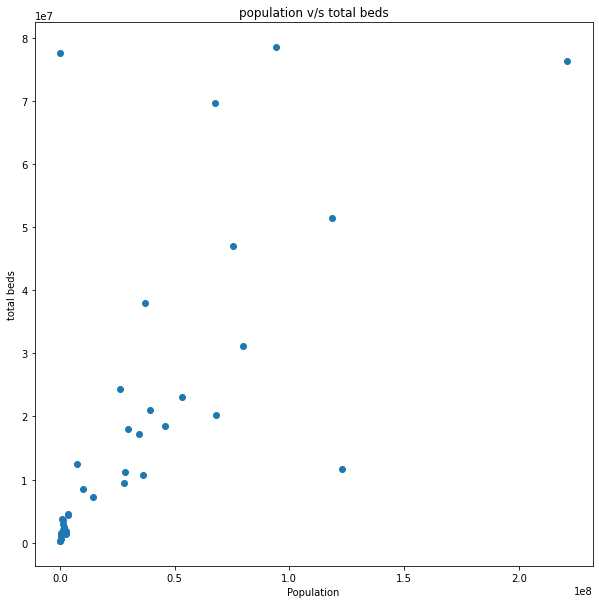

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(INA['population'],INA['total beds'])
plt.xlabel('Population')
plt.ylabel('total beds')
plt.title('population v/s total beds')
plt.show()



*   Generally , there is kind of linear relationship between total beds and population, except few points which has more or less no. of beds w.r.t population

* The overall graph shows that , almost all states has sufficient no of beds , except fwe states.




#USA data Analysis

In [ ]:
USA = pd.read_csv('hospital_beds_USA_v1.csv')
USA.head()

,country,state,county,lat,lng,type,measure,beds,population,year,source,source_url
0,US,AK,aleutians east,63.588753,-154.493062,ICU,1000HAB,0.000000,3338,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
1,US,AK,aleutians west,63.588753,-154.493062,ICU,1000HAB,0.000000,5784,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
2,US,AK,anchorage,63.588753,-154.493062,ACUTE,1000HAB,2.182916,298225,2018,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...
3,US,AK,anchorage,63.588753,-154.493062,ICU,1000HAB,0.244782,298225,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
4,US,AK,anchorage,63.588753,-154.493062,OTHER,1000HAB,0.191131,298225,2019,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...


#Removing Unwanted cells from the dataset

In [ ]:
USA.drop(columns=['source_url','source','lng','lat','year'] ,inplace=True)

In [ ]:
USA.head()

,country,state,county,type,measure,beds,population
0,US,AK,aleutians east,ICU,1000HAB,0.000000,3338
1,US,AK,aleutians west,ICU,1000HAB,0.000000,5784
2,US,AK,anchorage,ACUTE,1000HAB,2.182916,298225
3,US,AK,anchorage,ICU,1000HAB,0.244782,298225
4,US,AK,anchorage,OTHER,1000HAB,0.191131,298225


In [ ]:
#finding out the missing value
USA.isnull().sum()

country       0
state         0
county        0
type          0
measure       0
beds          0
population    0
dtype: int64

*There is no missing value in the dataset

#Total no of beds

total beds = USA['beds'] * USA['population']

In [ ]:
USA['total beds'] = USA['beds'] * USA['population']

In [ ]:
USA['total beds']

0            0.000000
1            0.000000
2       651000.124100
3        73000.111950
4        57000.042475
            ...      
5708     41999.993528
5709      5999.996110
5710    182999.995524
5711     17999.999325
5712     12000.002168
Name: total beds, Length: 5713, dtype: float64

#Droping the areas(rows) where avialable no. of beds is zero

In [ ]:
USA.drop(USA[USA['total beds']==0].index , inplace=True)
USA.shape

(4695, 8)

#Data Exploration

In [ ]:
USA.dtypes

country        object
state          object
county         object
type           object
measure        object
beds          float64
population      int64
total beds    float64
dtype: object

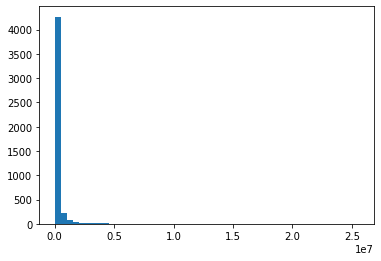

In [ ]:
plt.hist(USA['total beds'], bins=50)
plt.show()

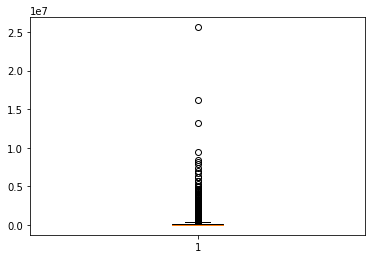

In [ ]:
plt.boxplot(USA['total beds'])
plt.show()

In [ ]:
USA['total beds'].describe()

count    4.695000e+03
mean     2.272136e+05
std      7.614668e+05
min      1.000009e+03
25%      2.499999e+04
50%      5.000000e+04
75%      1.540000e+05
max      2.560600e+07
Name: total beds, dtype: float64

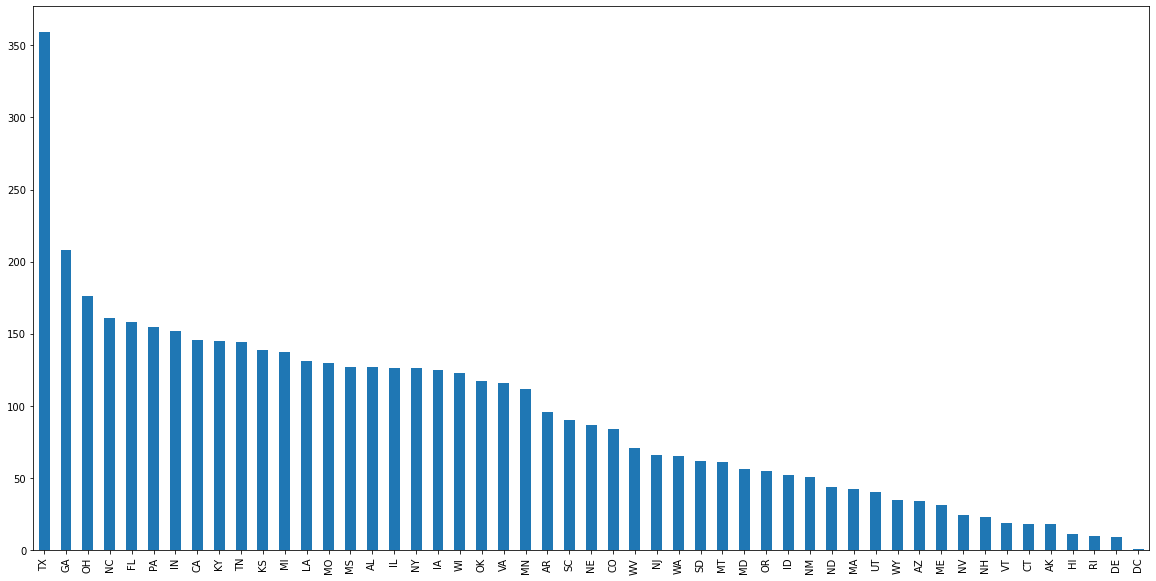

In [ ]:
# fig,ax = plt.subplots(figsize=(10,10))
# ax.bar(USA['state'], USA['state'].value_counts())
(USA['state'].value_counts()).plot(kind='bar',figsize=(20,10))

* Above graph shows the analysis of state variable

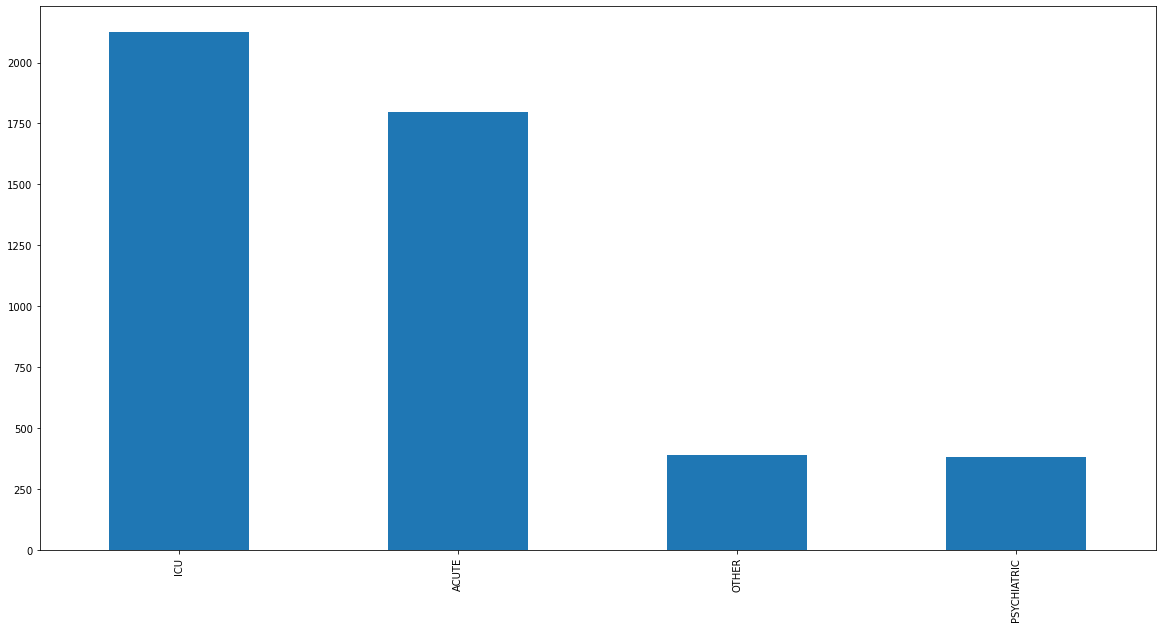

In [ ]:
(USA['type'].value_counts()).plot(kind='bar',figsize=(20,10))

* Above graph shows the  analysis of Type categorical variable

# State v/s Population

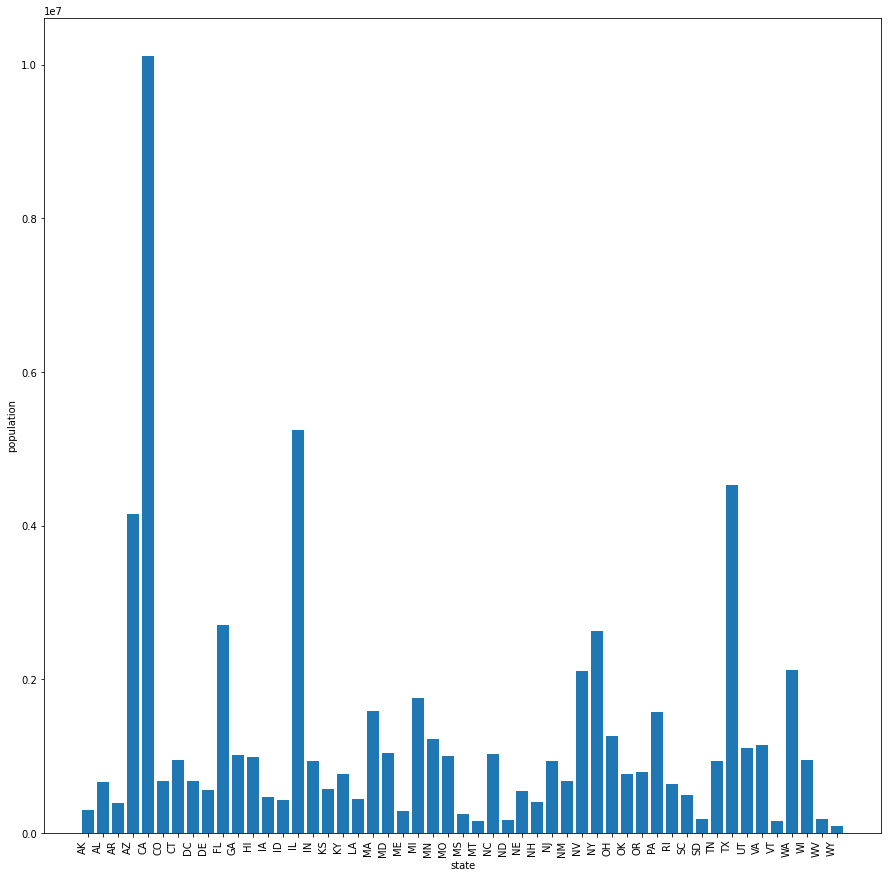

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.xlabel('state')
plt.ylabel('population')
ax.bar(USA['state'],USA['population'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, horizontalalignment='right')
plt.show()

#Type v/s Total no. of beds

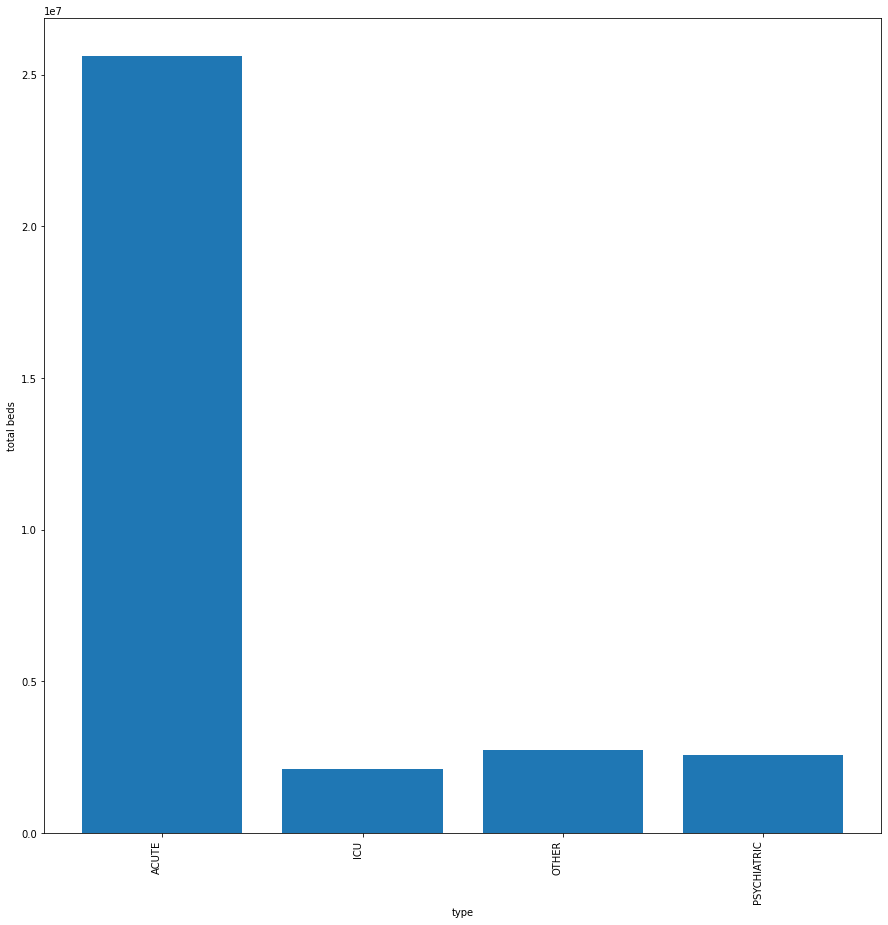

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.xlabel('state')
plt.ylabel('population')
ax.bar(USA['state'],USA['population'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, horizontalalignment='right')
plt.show()

* Maximum of avialable beds are of 'ACUTE' type
* Very Few ICU beds are avialable

#state v/s Total no of beds

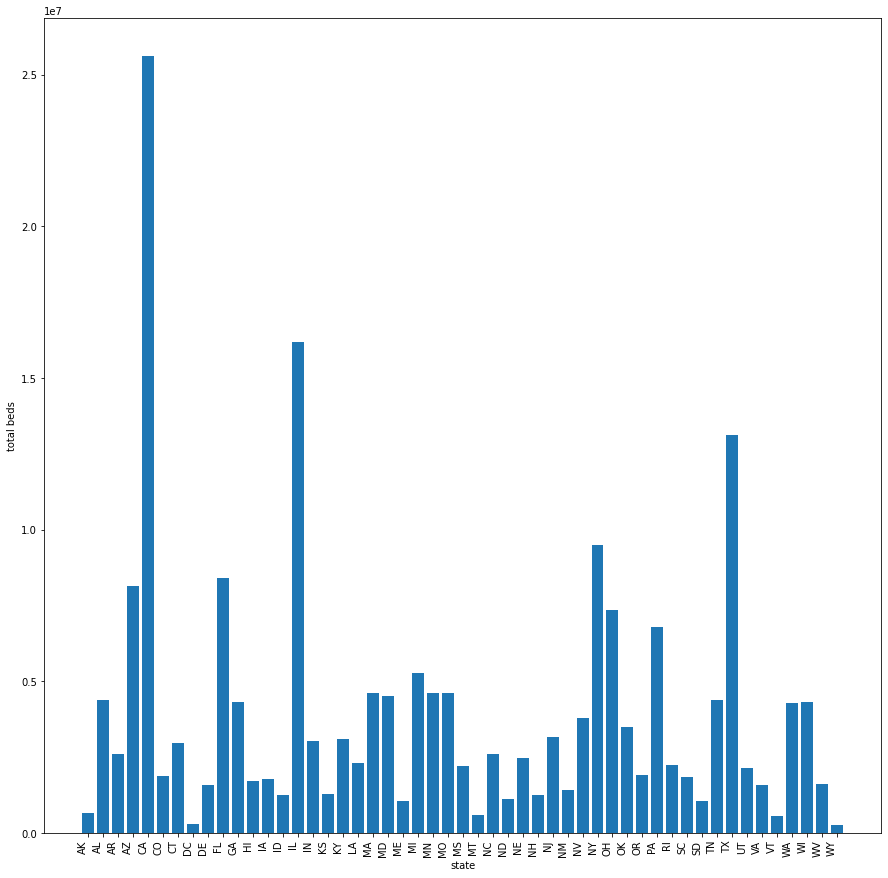

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.xlabel('state')
plt.ylabel('population')
ax.bar(USA['state'],USA['population'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, horizontalalignment='right')
plt.show()

* 'CA' has maximum number of beds avialable for their population.
* variation of avialable no. of beds w.r.t state is given in the above graph


#Population v/s No. of beds

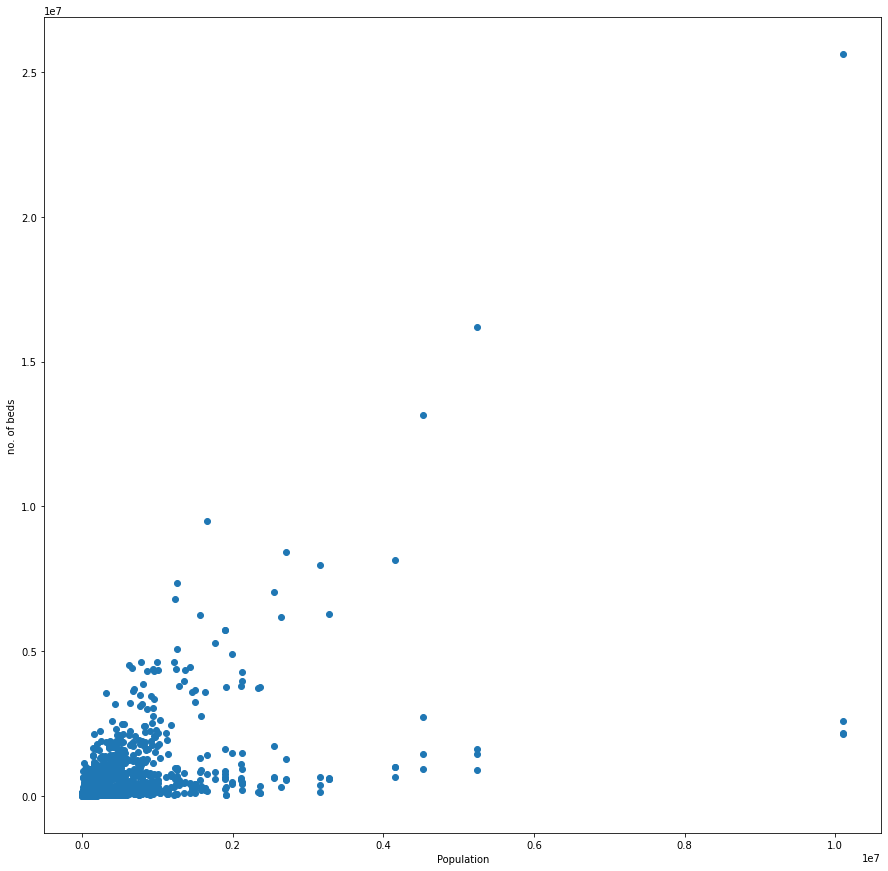

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plt.xlabel('Population')
plt.ylabel('no. of beds')
ax.scatter(USA['population'] , USA['total beds'])
plt.show()


* As population increases ,avialable no of beds also increases.
* For the state having population 20 to 40 Million  avialable no of beds are very less than expected.

#Comparison between two countries

In [ ]:
#Avarage population
x=USA['population'].mean()

y=INA['population'].mean()
print(x,y)


204881.86645367413 35013909.777777776


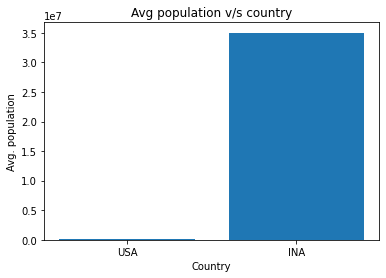

In [ ]:
plt.bar(['USA','INA'] ,[x,y])
plt.xlabel('Country')
plt.ylabel('Avg. population')
plt.title('Avg population v/s country')
plt.show()

* Avarage population of the INA is much more greater than USA

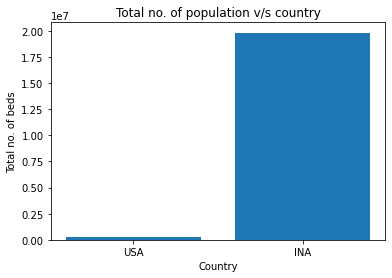

In [ ]:
x1 = USA['total beds'].mean()
y1 = INA['total beds'].mean()
plt.bar(['USA','INA'],[x1,y1])
plt.xlabel('Country')
plt.ylabel('Total no. of beds')
plt.title('Total no. of population v/s country')
plt.show()

* As population of India is grater than USA , average no of avialable beds in case of India is greater than USA.

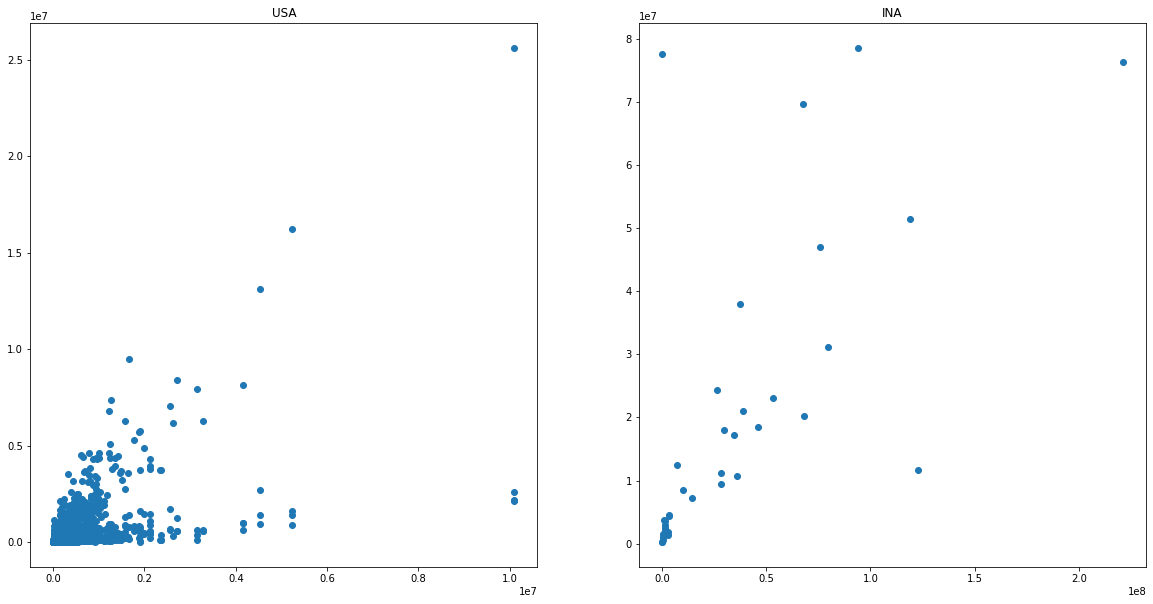

In [ ]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(20)

axs[0].scatter(USA['population'],USA['total beds'])

axs[0].set_title('USA')
axs[1].scatter(INA['population'],INA['total beds'])
axs[1].set_title('INA')
plt.show()

* Above graph diaplays the comparison between the two countries in case of total no. of available beds over the population. 